In [1]:
from aux_train import *
from aux_plot import *
import API_Numpy
import API_TensorFlow

from aux_func_V3 import *

float_pres = 'float64' # Definindo a precisão padrão para as análises

In [ ]:
# equation=transp_equation
# Sim_Z=simulation(API_Numpy,equation,WENO_Z)
# Sim_JS=simulation(API_Numpy,equation,WENO_JS)
# Sim_DS_1=load_model('Modelos treinados/ebdmyfkw/sparkling-sweep-30',equation=equation,WENO_method=WENO_Z)
# Sim_DS_2=load_model('Modelos treinados/ebdmyfkw/chocolate-sweep-22',equation=equation,WENO_method=WENO_Z)
# Sim_DS_3=load_model('Modelos treinados/ebdmyfkw/atomic-sweep-24',equation=equation,WENO_method=WENO_Z)
# Sim_Z_MS=simulation(API_Numpy,equation,WENO_Z,mapping=pre_mapping,map_function=Hong_mapping)
# Sim_ZM_MS=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=Hong_mapping)
# Sim_ZM_BI=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=BI_mapping)
# Δx=0.01
# CFL=0.5

In [ ]:
# x_dense, fx_dense = create_f_points(f_test_1,Δx/100)
# x, fx = create_f_points(f_test_1,Δx)

In [ ]:
# Z_y=Sim_Z.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)
# net_y=Sim_DS_1.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)
# net2_y=Sim_DS_2.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)
# net3_y=Sim_DS_3.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)

In [ ]:
# ref_y=Sim_Z.Sim(fx_dense,0.1,Δx/100,0.5,FronteiraPeriodica)

In [ ]:
# print(np.sum(np.abs(net_y-ref_y[0,np.arange(0,20000,100)])))
# print(np.sum(np.abs(net2_y-ref_y[0,np.arange(0,20000,100)])))
# print(np.sum(np.abs(net3_y-ref_y[0,np.arange(0,20000,100)])))
# print(np.sum(np.abs(Z_y-ref_y[0,np.arange(0,20000,100)])))

In [ ]:
# plt.figure(figsize=(16,16))
# plt.plot(x,net_y[0],'s',label='Melhor rede')
# plt.plot(x,net2_y[0],'d',label='Pior rede')
# plt.plot(x,net3_y[0],'o',label='Rede mediana')
# plt.plot(x,Z_y[0],'x',label='WENO-Z')
# plt.plot(x_dense,ref_y[0],'--',label='Sol. Ref.',color='black')
# plt.xlim(0.05,0.15)
# plt.legend()
# plt.savefig('compara redes.png')

In [ ]:
# print(np.sum(np.abs(net_y-ref_y[0,np.arange(0,20000,100)])))
# print(np.sum(np.abs(net2_y-ref_y[0,np.arange(0,20000,100)])))
# print(np.sum(np.abs(Z_y-ref_y[0,np.arange(0,20000,100)])))

In [ ]:
# evolve_plot = compara_evolve(
#     WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_DS_1.Sim,Sim_ZM_MS.Sim,Sim_DS_ZM_MS.Sim],
#     Δx        = Δx,
#     malha     = [10,1,1,1,1],
#     names     = ['Sol. Ref.','WENO-Z','WENO-DS Melhor','WENO-ZM MS','WENO-DS ZM MS'],
#     use_cache = [False],
#     replace=False,
#     f_test=f_test_1,
#     f_transform=lambda x:x,
#     fronteira=FronteiraPeriodica,
#     x_range=(-1,1),
#     xlim=(-0.05,0.05),
#     ylim=(-0.1,1.1),
#     colors=['black','#ffaa55','#55aaff','#55ffaa','red'],
#     shapes=['--','o','d','x','s'],
#     figsize=(8,8))
# Δt=0.01
# evolve_plot.gif_framework(int(2/Δt),Δt,'imagens/transp DS ZM MS zoomed')

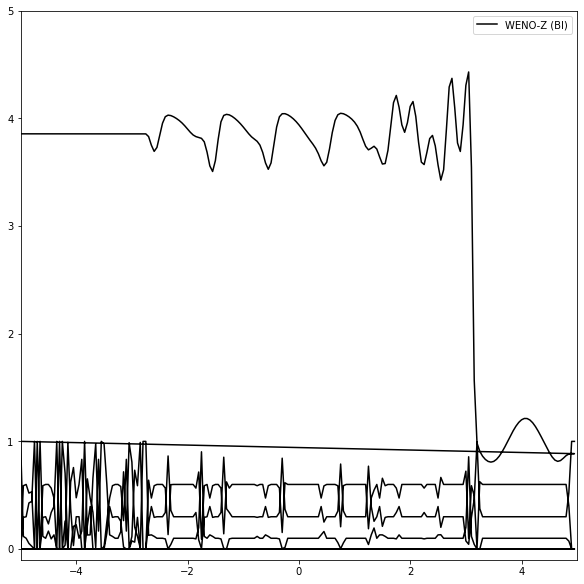

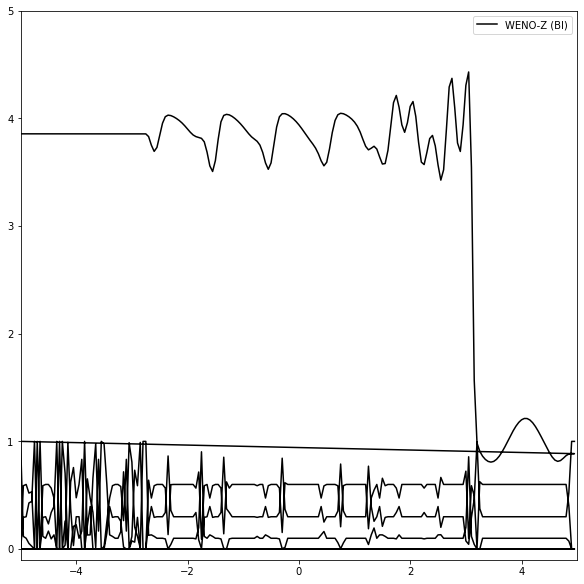

In [3]:
# # Shock density wave Shu–Osher
# #-------------------------------------------------------------------
# t_final   = 1.8
# n         = 200
# interval  = [-5, 5]
# # fator     = 40
# # n_ref     = n*fator
# fronteira = FronteiraFixa
# #-------------------------------------------------------------------
# Δx     = (interval[1]-interval[0])/n
# # Δx_ref = (interval[1]-interval[0])/n_ref
# x     = tf.range(interval[0], interval[1], Δx    , dtype=dtype)
# # x_ref = tf.range(interval[0], interval[1], Δx_ref, dtype=dtype

# CFL = 0.5
# γ   = 1.4
# # Shock density wave Shu–Osher
# #-------------------------------------------------------------------
# def f_test(x):
#     k = 5
#     ρ = np.where(x < -4, 3.857143, 1+0.2*np.sin(k*x))
#     u = np.where(x < -4, 2.629369, 0)
#     p = np.where(x < -4, 31/3    , 1)
#     E = p/(γ-1)+ρ*(u**2)/2
#     Q = np.stack([ρ,ρ*u,E], axis=0)
#     return Q

# Q     = f_test(x)
# # Q_ref = f_test(x_ref)
# #-------------------------------------------------------------------

Δx = 0.01

def f_test(x):
    z = tf.constant(-0.7, dtype=dtype)
    δ = tf.constant(0.005, dtype=dtype)
    β = tf.math.log(tf.constant(2.0, dtype=dtype))/(36.0*(δ**2.0))
    a = tf.constant(0.5, dtype=dtype)
    α = tf.constant(10, dtype=dtype)
    
    def G(x, β, z):
        return tf.math.exp(-β*(x-z)**2)
    
    def F(x, α, a):
        return tf.math.sqrt(tf.math.maximum(1-(α**2)*((x-a)**2),0))
    
    f1 = (G(x, β, z-δ) + 4*G(x, β, z) + G(x, β, z+δ))/6 # x in [-0.8, -0.6]
    f2 = 1                                              # x in [-0.4, -0.2]
    f3 = 1-tf.math.abs(10*(x-0.1))                      # x in [ 0.0,  0.2]
    f4 = (F(x, α, a-δ) + 4*F(x, α, a) + F(x, α, a+δ))/6 # x in [ 0.4,  0.6]
    f5 = 0                                              # otherwise
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, -0.8),
        tf.math.less_equal(x, -0.6)
    )
    f1 = f1*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, -0.4),
        tf.math.less_equal(x, -0.2)
    )
    f2 = f2*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, 0.0),
        tf.math.less_equal(x, 0.2)
    )
    f3 = f3*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    condition = tf.math.logical_and(
        tf.math.greater_equal(x, 0.4),
        tf.math.less_equal(x, 0.6)
    )
    f4 = f4*tf.cast(tf.where(condition, 1.0, 0.0), dtype=dtype)
    
    f = f1 + f2 + f3 + f4 + f5
    
    return f

aux = simulation(API_Numpy, transp_equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default)

def weight_transf(x):
    x = x[...,0,:]
    w = aux.Get_weights(x, Δx, fronteira)[0]
    x = x
    return np.concatenate([x, w[:,0], w[:,1], w[:,2]], axis=0)

evolve_plot = compara_evolve(
    WENOs       = [aux.Sim]     ,
    Δx          = Δx            ,
    malha       = [1]           ,
    names       = ['WENO-Z (BI)'],
    use_cache   = [False]       ,
    replace     = True          ,
    f_test      = f_test        ,
    f_transform = weight_transf ,
    fronteira   = fronteira     ,
    x_range     = (interval[0],interval[1]),
    xlim        = (interval[0],interval[1]),
    ylim        = (-0.1,5)         ,
    colors      = ['black','blue','red','black']     ,
    shapes      = ['-', 's', 'c', 'd']        ,
    figsize     = (8,8))
Δt = 0.01
evolve_plot.gif_framework(int(2/Δt), Δt, 'imagens/Pesos Euler/WENO-Z (BI)')

In [ ]:
equation=euler_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
#Sim_DS=load_model('Modelos treinados/Modelo Rede temporal sequencial 1',equation=equation,WENO_method=WENO_Z)
Sim_Z_MS=simulation(API_Numpy,equation,WENO_Z,mapping=pre_mapping,map_function=Hong_mapping)
Sim_ZM_MS=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=Hong_mapping)
Sim_ZM_BI=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=BI_mapping)
n_pts=400
Δx=1/(n_pts-1)
x=np.arange(0,1,Δx)
γ=1.4
CFL=0.9
FinalTime=0.038

In [ ]:
def f_blast(x):
    k=5
    ρ=x-x+1
    u=x-x
    p=np.where(x< 0.1,1000,0.01)
    p=np.where(0.9<=x,100,p)
    E=p/(γ-1)+ρ*(u**2)/2

    Q=np.stack([ρ,ρ*u,E],axis=0)
    return Q

In [ ]:
def f_transform(Q):
    Q0,Q1,Q2=API_Numpy.unstack(Q,axis=-2)
    a=γ-1.0
    b=Q1**2
    c=2*Q0
    d=b/c
    e=Q2-d
    return a*e

In [ ]:
evolve_plot=compara_evolve(WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_Z_MS.Sim,Sim_ZM_MS.Sim,Sim_ZM_BI.Sim],
                           Δx=Δx,
                           malha=[10,1,1,1,1],
                           names=['Sol. Ref.','WENO-Z','WENO-Z-MS','WENO-ZM-MS','WENO-ZM-BI'],
                           use_cache=[True,True,True,True,True],
                           replace=False,
                           f_test=f_blast,
                           f_transform=lambda x:x[0],
                           fronteira=FronteiraReflexiva,
                           x_range=(0,1),
                           xlim=(0.55,0.59),
                           ylim=(0,1),
                           colors=['black','#555555','#aaff55','#ffaa55','#55aaff'],
                           shapes=['--','-','-','-','-'],
                           figsize=(8,8))
Δt=0.0005
evolve_plot.gif_framework(int(0.038/Δt),Δt,'imagens/blast-MS zoomed')

In [ ]:
equation=burgers_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
#Sim_DS=load_model('Modelos treinados/Modelo Rede temporal conv3 - 1',equation=equation,WENO_method=WENO_Z)
Sim_DS=Sim_Z

In [ ]:
equation=burgers_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
Sim_DS_1=load_model('Modelos treinados/23cifbcu/misty-sweep-18',equation=equation,WENO_method=WENO_Z)
Sim_DS_2=load_model('Modelos treinados/23cifbcu/treasured-sweep-29',equation=equation,WENO_method=WENO_Z)
Δx=0.01
CFL=0.5

In [ ]:
evolve_plot1=compara_evolve(WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_DS_1.Sim,Sim_DS_2.Sim],
                           Δx=0.01,
                           malha=[10,1,1,1],
                           names=['Sol. ref.','WENO-Z','WENO-DS bom','WENO-DS ruim'],
                           use_cache=[True,True,False,False],
                           replace=False,
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff', '#55ffaa'],
                           shapes=['--','d','o','s'])

evolve_plot1.gif_framework(int(1/0.01),0.01,'imagens/burgers-ds 2')

In [ ]:
ref_u,Z_u,net1_u,net2_u=evolve_plot1.U

In [ ]:
print(np.sum(np.abs(net1_u-ref_u[0,np.arange(0,2000,10)])))
print(np.sum(np.abs(net2_u-ref_u[0,np.arange(0,2000,10)])))
print(np.sum(np.abs(Z_u-ref_u[0,np.arange(0,2000,10)])))

In [ ]:
evolve_plot2=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(0.4,0.6),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot2.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2')

In [ ]:
evolve_plot3=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_1,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot3.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 1')

In [ ]:
evolve_plot4=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot4.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2 satur')